# R script

***
###   

In [1]:
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [3]:
# Load AUROC file
RNALight_lgb <- read.csv('../03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/LightGBM/AUROC_info.txt',sep = '\t')
RNALight_SVM <- read.csv('../03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/SVM/AUROC_info.txt',sep = '\t')
RNALight_lr <- read.csv('../03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/LogisticRegression/AUROC_info.txt',sep = '\t')
RNALight_CNN <- read.csv('../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_9000nt_Model_Output/AUROC_info.txt',sep = '\t')
RNALight_CNN_RNN <- read.csv('../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_9000nt_Model_Output/AUROC_info.txt',sep = '\t')
RNALight_RNN <- read.csv('../03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/RNN_9000nt_Model_Output/AUROC_info.txt',sep = '\t')

# Group
RNALight_lgb$group <- "lgb"
RNALight_SVM$group <- "SVM"
RNALight_lr $group <- "lr"
RNALight_CNN$group <- "CNN"
RNALight_CNN_RNN$group <- "CNN_RNN"
RNALight_RNN$group <- "RNN"

RNALight_dataset <- rbind(RNALight_lgb,RNALight_SVM,RNALight_lr,RNALight_CNN,RNALight_CNN_RNN,RNALight_RNN)
RNALight_dataset$group<- factor(RNALight_dataset$group,
                levels = c("lgb",  "SVM","lr","CNN","CNN_RNN","RNN"))

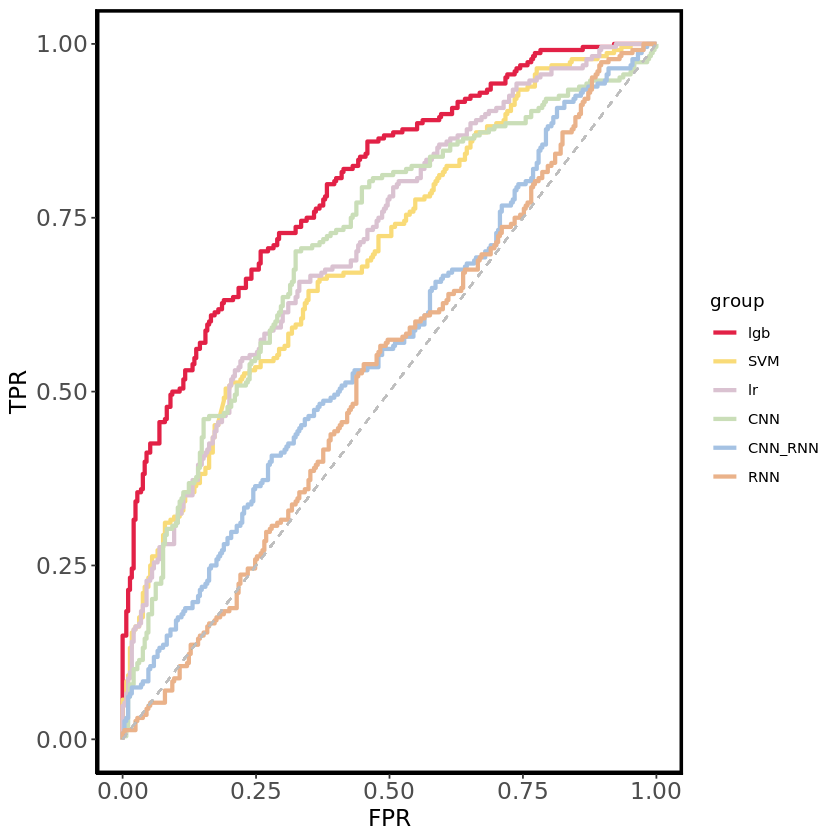

In [4]:
# Plot
p_auc_RNALight <- ggplot(data=RNALight_dataset ,aes(x=FPR,y=TPR))+
geom_line(aes(color=group),size = 1.2)+
geom_segment(x=0,xend=1,y=0,yend=1,colour ="gray",linetype = "dashed")+
theme_classic()+
theme(panel.border = element_rect(colour = "black", fill=NA,size = 2),
      axis.text = element_text(size=14),
      axis.title = element_text(size=14))+
scale_color_manual(values = c("#E22146","#F9DB78","#DAC2D1","#CADEB8","#A5C2E3","#EAB28A"))
ggsave("./02_RNA-Light_Test-mRNA_AUC_with_text.pdf", p_auc_RNALight, width = 10, height = 10) 
p_auc_RNALight

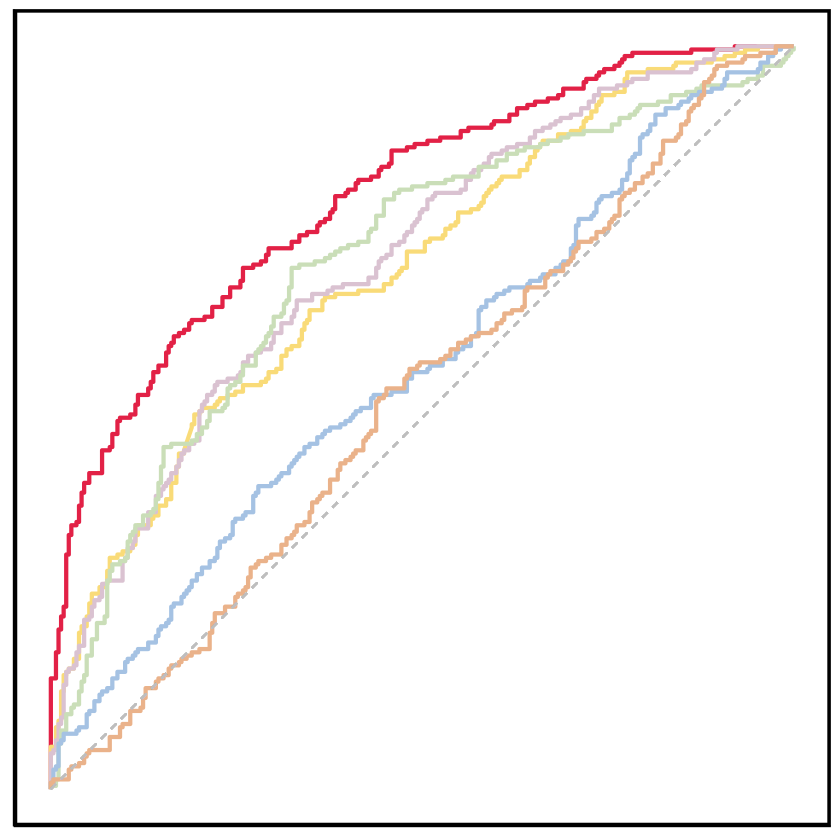

In [5]:
p_auc_RNALight <- p_auc_RNALight + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./02_RNA-Light_Test-mRNA_AUC.pdf", p_auc_RNALight, width = 10, height = 10) 
p_auc_RNALight

In [6]:
# From ../03_Model_Construction/*Model/*Output/$Model/Evaluate_Result_TestSet.txt
RNALight_auc_df <- data.frame(list("auc" = c(0.7984119782214156,0.6981170598911071,0.7136721113127648,0.7086963097398669,0.5650332728372656,0.5252419842710224),
                                  "model" = c("LightGBM","SVM","LR","CNN","CNN_RNN","RNN")))
RNALight_auc_df$model<- factor(RNALight_auc_df$model,
                levels = c("LightGBM","SVM","LR","CNN","CNN_RNN","RNN"))

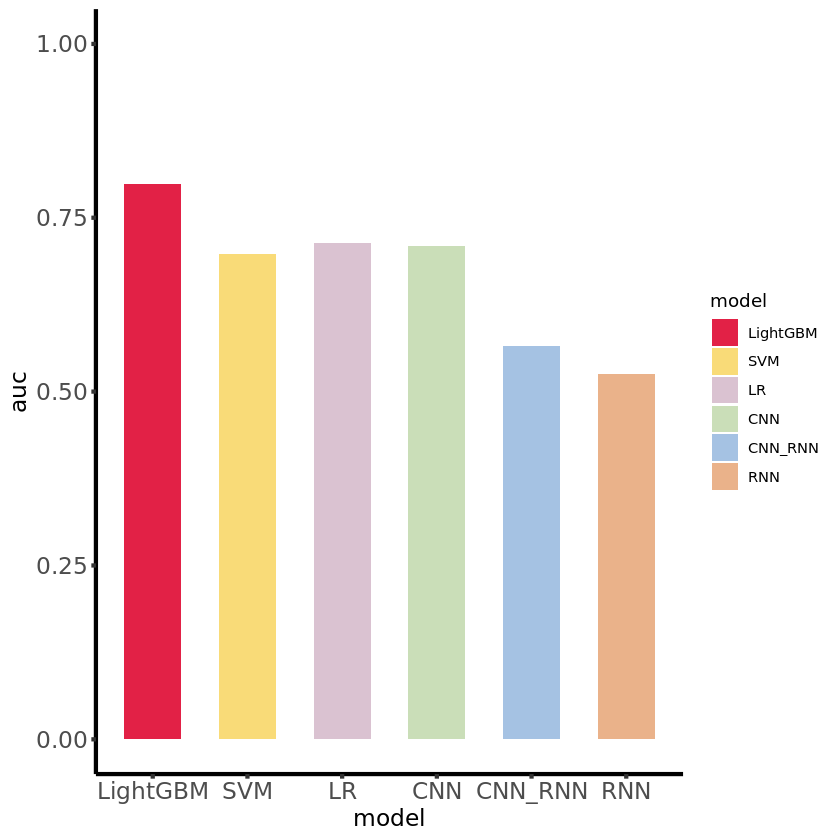

In [7]:
p_auc_RNALight_bar <- ggplot(RNALight_auc_df ,aes(x=model,y=auc,fill = model))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6) +
ylim(0,1) +
theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))+
scale_fill_manual(values = c("#E22146","#F9DB78","#DAC2D1","#CADEB8","#A5C2E3","#EAB28A"))
ggsave("./02_RNA-Light_Test-mRNA_AUC_bar_with_text.pdf",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar

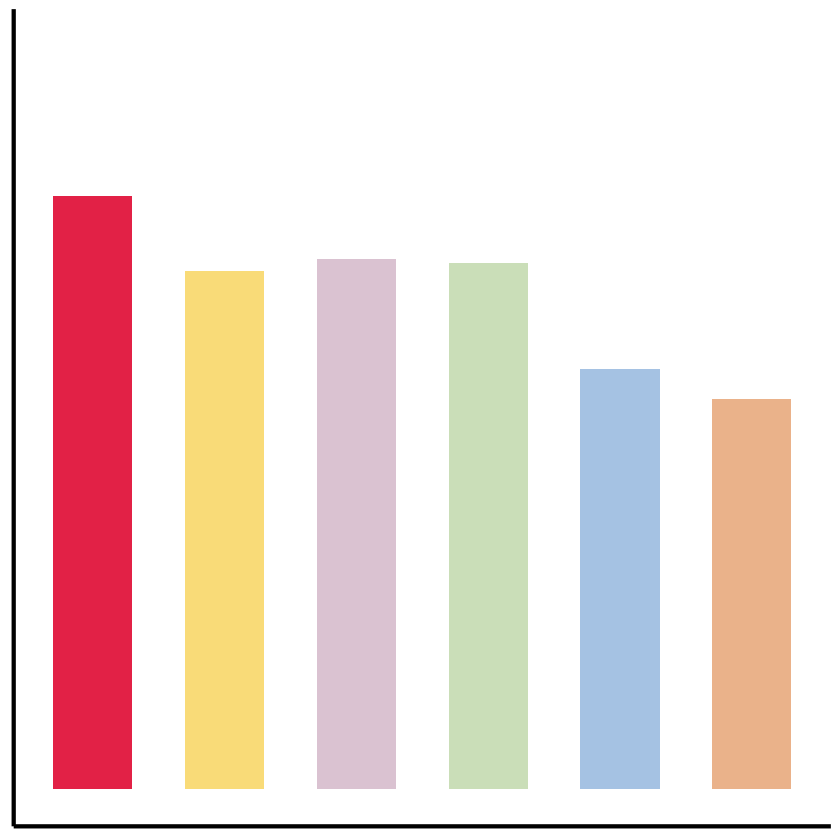

In [8]:
p_auc_RNALight_bar <- p_auc_RNALight_bar+ theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./02_RNA-Light_Test-mRNA_AUC_bar.pdf", p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar